In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load data
df = pd.read_csv('housing.csv')

# Separate features and target
x = df.drop(["median_house_value"],axis=1)
y = df['median_house_value']

# One-hot encoding
x = pd.get_dummies(x,columns=["ocean_proximity"])


# Train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=42)

# Model 
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("elasticnet", ElasticNet(max_iter=10000))
])


# GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    "elasticnet__alpha": [0.0001, 0.001, 0.01, 0.1],
    "elasticnet__l1_ratio": [0.1, 0.5, 0.9]
}
elasticnet_regression = GridSearchCV(pipeline,param_grid,scoring='neg_mean_squared_error', cv=10)

In [13]:
elasticnet_regression.fit(x_train, y_train)

c:\Users\nisha\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.044e+13, tolerance: 1.733e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\nisha\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.077e+13, tolerance: 1.737e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\nisha\anaconda3\envs\ml\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

,estimator,Pipeline(step...iter=10000))])
,param_grid,"{'elasticnet__alpha': [0.0001, 0.001, ...], 'elasticnet__l1_ratio': [0.1, 0.5, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


In [14]:
elasticnet_pred = elasticnet_regression.predict(x_test)

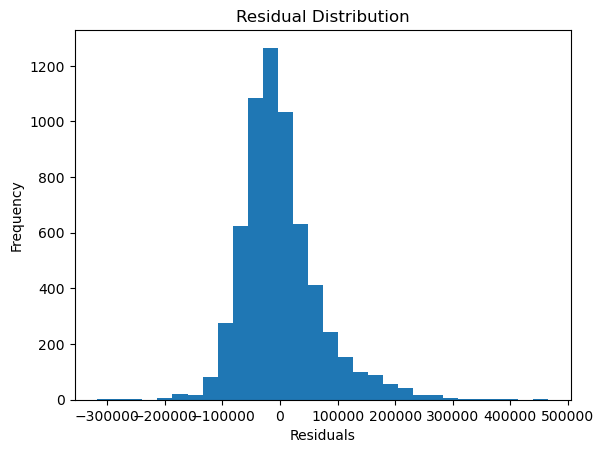

In [15]:
#visualization
residuals = y_test - elasticnet_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

In [16]:
from sklearn.metrics import r2_score
score = r2_score(y_test,elasticnet_pred)
print(score)

0.6398401841321038
